In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
sp_tracks = pd.read_csv('/Users/carson/Desktop/Projects/Spotify/Data/universal_top_spotify_songs.csv', parse_dates = ['snapshot_date', 'album_release_date'])

# Data Exploration: Examining the data features and null values

In [3]:
sp_tracks.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2024-09-27,100,False,...,6,-7.777,0,0.0304,0.30800,0.000000,0.122,0.535,157.969,3
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,NaN,2024-09-27,99,False,...,2,-10.171,1,0.0358,0.20000,0.060800,0.117,0.438,104.978,4
2,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,3,0,1,NaN,2024-09-27,94,False,...,0,-3.743,0,0.0320,0.00289,0.000000,0.193,0.838,116.034,4
3,5G2f63n7IPVPPjfNIGih7Q,Taste,Sabrina Carpenter,4,0,-1,NaN,2024-09-27,96,False,...,3,-4.086,1,0.0640,0.10100,0.000000,0.297,0.721,112.964,4
4,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,5,0,0,NaN,2024-09-27,97,True,...,0,-5.478,1,0.0285,0.10700,0.000065,0.185,0.690,103.969,4


In [4]:
pd.isnull(sp_tracks).sum()

spotify_id                0
name                     27
artists                  27
daily_rank                0
daily_movement            0
weekly_movement           0
country               16957
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              634
album_release_date      472
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [5]:
sp_tracks.dtypes

spotify_id                    object
name                          object
artists                       object
daily_rank                     int64
daily_movement                 int64
weekly_movement                int64
country                       object
snapshot_date         datetime64[ns]
popularity                     int64
is_explicit                     bool
duration_ms                    int64
album_name                    object
album_release_date    datetime64[ns]
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature                 int64
dtype: object

In [6]:
sp_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
daily_rank,1248753.0,25.490830,14.428690,1.000000,13.0000,25.000000,38.000000,50.000
daily_movement,1248753.0,0.774766,6.623346,-49.000000,-1.0000,0.000000,2.000000,49.000
weekly_movement,1248753.0,2.456599,11.730132,-49.000000,-3.0000,0.000000,5.000000,49.000
popularity,1248753.0,76.674715,15.907451,0.000000,66.0000,80.000000,89.000000,100.000
duration_ms,1248753.0,192336.875762,49948.475877,0.000000,160500.0000,184841.000000,216356.000000,939666.000
danceability,1248753.0,0.685911,0.137039,0.000000,0.5960,0.704000,0.788000,0.988
energy,1248753.0,0.652823,0.162199,0.000020,0.5520,0.672000,0.764000,0.998
key,1248753.0,5.528147,3.573350,0.000000,2.0000,6.000000,9.000000,11.000
loudness,1248753.0,-6.424014,2.578330,-37.334000,-7.7770,-5.966000,-4.698000,3.233
mode,1248753.0,0.538812,0.498492,0.000000,0.0000,1.000000,1.000000,1.000


# Exploratory Data Analysis: Examining the distribution of audio features and applying basic statistical analysis

In [7]:
# Current top 50 most popular spotify tracks (Fri Sep 27)
sp_top50 = sp_tracks[(sp_tracks.popularity > 50) & (sp_tracks.snapshot_date == sp_tracks.snapshot_date.max())]
sp_top50.tail()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3645,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,46,-7,-17,AE,2024-09-27,91,False,...,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.9120,159.982,4
3646,62tJcdKJKBBGYbav0XHWAr,"Eyy Banane - From ""Vaazha""","electronic kili, Vinayak Sasikumar",47,0,3,AE,2024-09-27,54,False,...,0,-7.740,0,0.1060,0.5560,0.000903,0.1340,0.4060,159.940,4
3647,3hRV0jL3vUpRrcy398teAU,The Night We Met,Lord Huron,48,0,-1,AE,2024-09-27,90,False,...,9,-9.514,1,0.0452,0.9680,0.272000,0.6380,0.0998,174.097,3
3648,0cQVqPuHQP4KEwc7ZUQmj6,Sweater Weather,The Neighbourhood,49,-6,-14,AE,2024-09-27,68,False,...,10,-2.851,1,0.0346,0.0426,0.015900,0.1020,0.3800,124.037,4
3649,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,50,-4,-9,AE,2024-09-27,87,False,...,8,-7.747,1,0.0353,0.8590,0.000000,0.1150,0.3700,120.001,4


The pearson correlation coefficient is a value between -1 and 1 that indicates how strongly correlated two numerical features are and what direction the regression trend line follows (+ or -). By creating a heatmap measuring pcc between all numerical features we will be able to determine the next best steps for our eda.

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'is_explicit'),
 Text(2.5, 0, 'duration_ms'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature')]

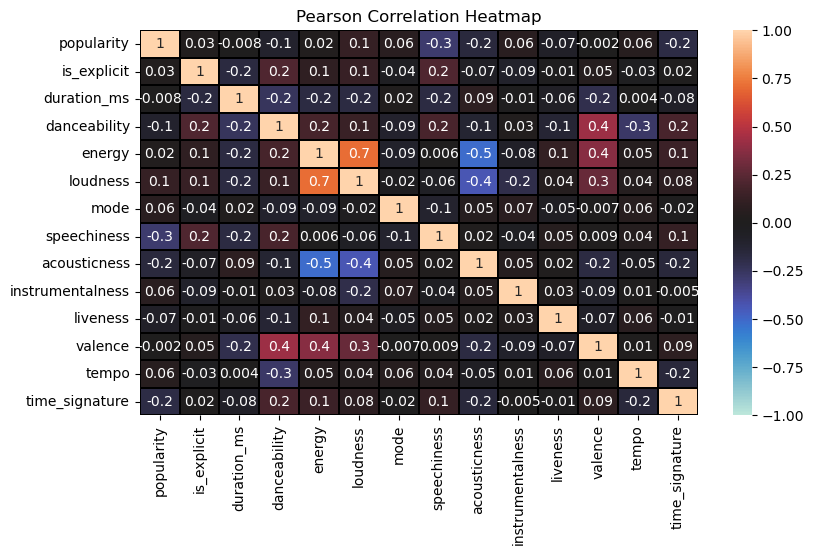

In [14]:
# Pearson Correlation Coefficient (r) Heatmap
td = sp_top50.drop(['spotify_id', 'name', 'artists', 'country', 'snapshot_date', 'daily_rank', 'daily_movement', 'weekly_movement', 'key'], axis = 1).corr(method = 'pearson')
plt.figure(figsize = (9, 5))
hmap = sns.heatmap(td, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, linewidths = 0.1, linecolor = 'black')
hmap.set_title('Pearson Correlation Heatmap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation = 90)

Based on an initial investigation of the correlation coefficient between song attributes, loudness and energy appear to be strongly correlated amongst the top 50 songs on spotify

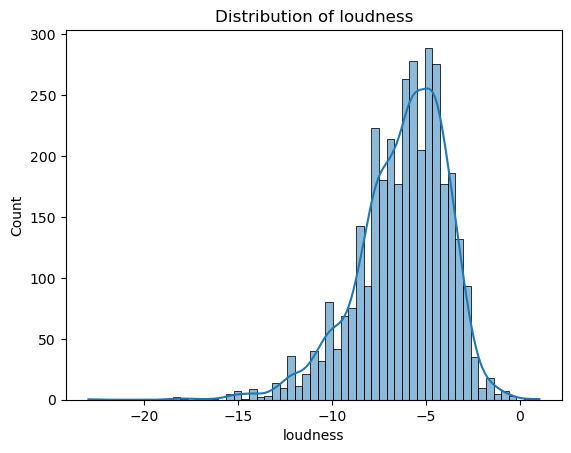

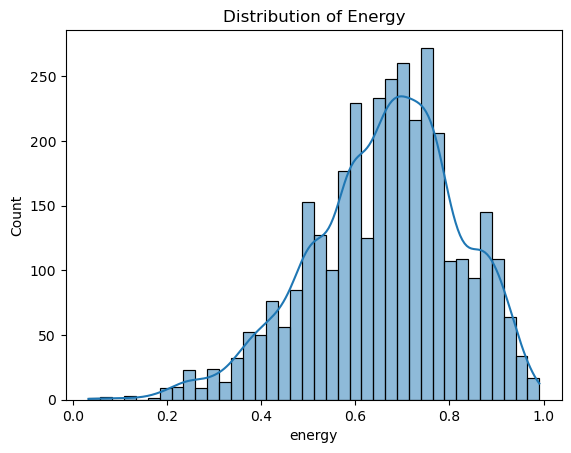

In [17]:
# Distribution of Loudness
sns.histplot(sp_top50['loudness'], kde = True)
plt.title('Distribution of loudness')
plt.show()

# Distribution of Energy
sns.histplot(sp_top50['energy'], kde = True)
plt.title('Distribution of Energy')
plt.show()

Text(0.5, 1.0, 'Regression Plot of Energy vs. Loudness')

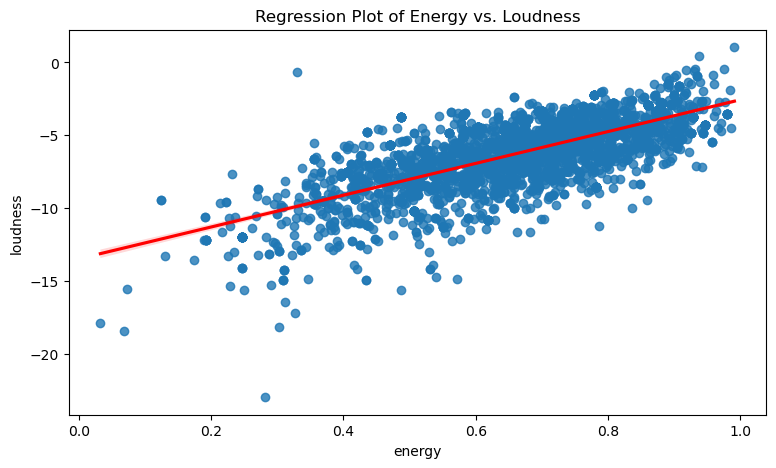

In [20]:
# Regression plot of loudness & energy
plt.figure(figsize = (9, 5))
sns.regplot(data = sp_top50, y = 'loudness', x = 'energy', line_kws = {'color': 'red'}).set_title('Regression Plot of Energy vs. Loudness')

Now lets visualize the duration of the top songs in Spotify

In [23]:
# convert duration from ms to s
sp_top50['duration'] = sp_top50['duration_ms'].apply (lambda x : round(x/1000))
sp_top50.duration.head()

/var/folders/cz/b7_nl94923q36jd72lz7rvmw0000gn/T/ipykernel_51837/2141978410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_top50['duration'] = sp_top50['duration_ms'].apply (lambda x : round(x/1000))


0    252
1    210
2    171
3    157
4    175
Name: duration, dtype: int64

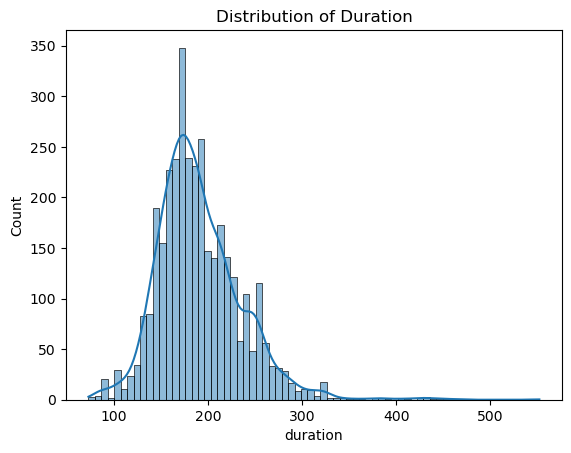

In [24]:
sns.histplot(sp_top50['duration'], kde = True)
plt.title('Distribution of Duration')
plt.show()

The most popular songs seem to last around 3 minutes in duration

Now lets investigate the most popular artists who have appeared in the top Spotify's top 50

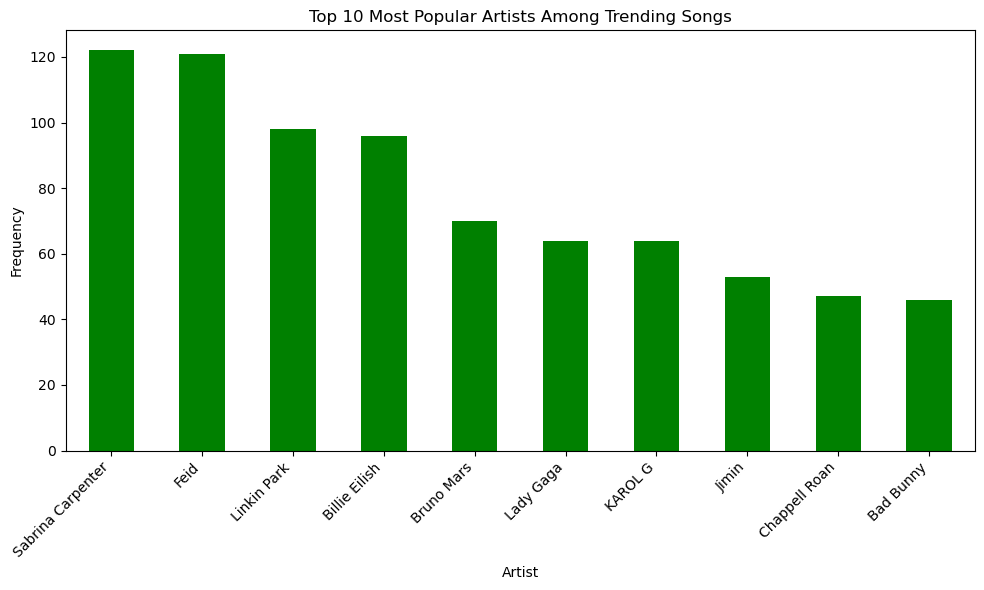

In [29]:
# List of artists who appeared in top 50
sp_artists = sp_top50['artists'].str.split(', ').explode()

# Top artists
top_artists = sp_artists.value_counts()

# Top 10 artists
top10_artists = top_artists.head(10)

plt.figure(figsize = (10, 6))
top10_artists.plot(kind = 'bar', color = 'green')
plt.title('Top 10 Most Popular Artists Among Trending Songs')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

Time Series Analysis

In [31]:
time_series = sp_tracks.groupby(['snapshot_date']).agg({
    'loudness': 'mean',
    'energy': 'mean'
})

print(time_series.sort_index().tail())

               loudness    energy
snapshot_date                    
2024-09-23    -6.269151  0.663122
2024-09-24    -6.345006  0.658118
2024-09-25    -6.368657  0.655295
2024-09-26    -6.346338  0.656667
2024-09-27    -6.308913  0.660199


<AxesSubplot:title={'center':'Loundess & Energy Time'}, xlabel='Snapshot Date', ylabel='Value'>

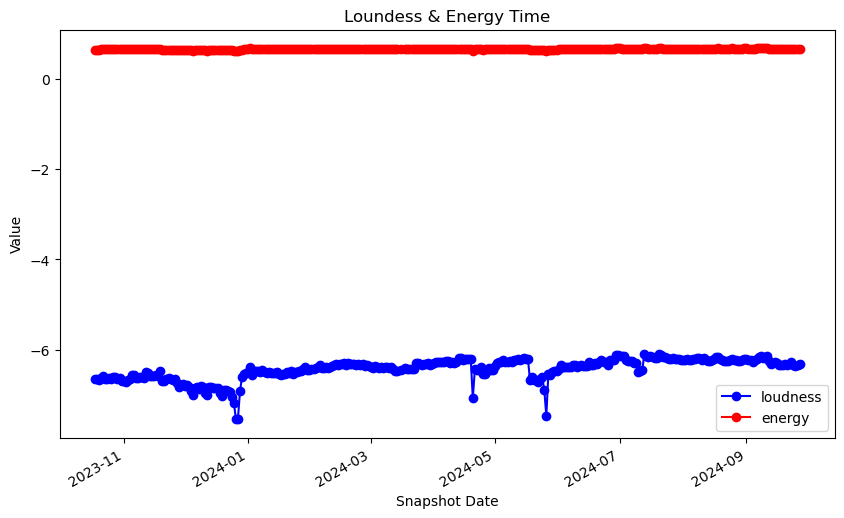

In [32]:
time_series.plot(
    y=['loudness', 'energy'],
    color=['blue', 'red'],  # Custom colors
    linestyle='-', marker='o',  # Set line style and markers
    figsize=(10, 6),  # Adjust plot size
    title='Loundess & Energy Time',
    xlabel='Snapshot Date', ylabel='Value'
)